In [412]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #repeatly split the train and test data
import statsmodels.api as sm
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [413]:
# Load data

housing_df = pd.read_csv('D:/Mahdieh_CourseUniversity/University_courses/ALY6020/Module_4/Nashville_housing_data.csv')

In [414]:
housing_df.shape

(22651, 26)

In [415]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [416]:
housing_df.describe()

,Unnamed: 0,Suite/ Condo #,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,22651.000000,0.0,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22650.000000,22651.000000,22648.000000,22650.000000,22543.000000
mean,27889.491192,NaN,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.377151,1961.947684,3.104910,1.887285,0.270239
std,16598.865706,NaN,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.094521,25.843908,0.829287,0.951220,0.480186
min,1.000000,NaN,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000
25%,13324.500000,NaN,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000
50%,27712.000000,NaN,0.280000,4026.000000,3.000000e+04,1.188000e+05,1645.824995,1959.000000,3.000000,2.000000,0.000000
75%,42330.500000,NaN,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.375000,1977.000000,4.000000,2.000000,1.000000
max,56615.000000,NaN,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [417]:
housing_df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

<AxesSubplot: >

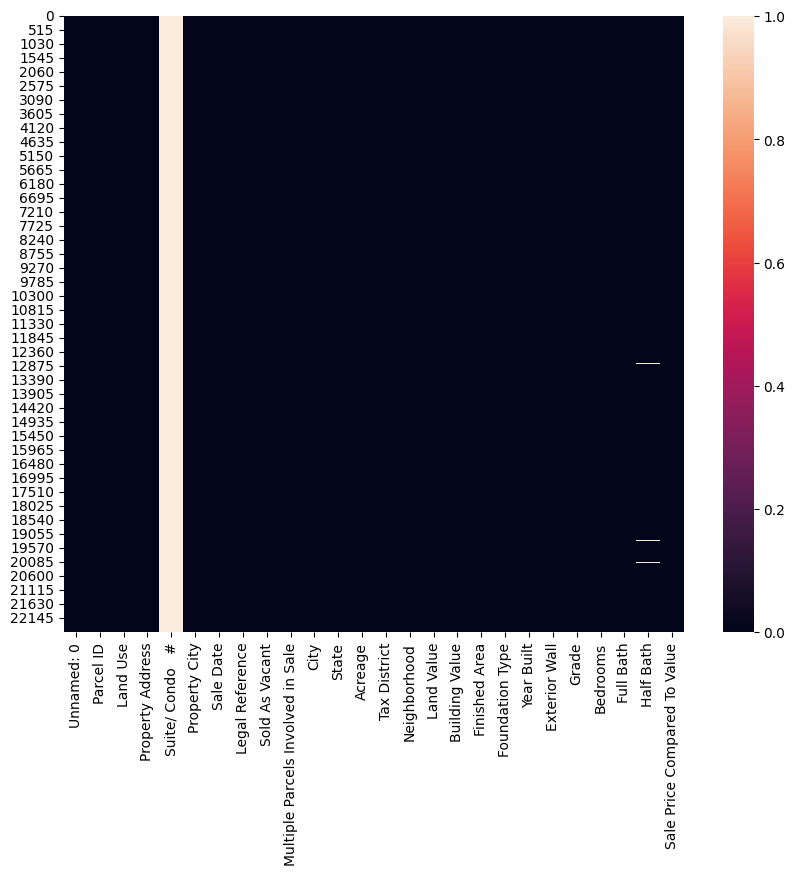

In [418]:
#check missing values

plt.figure(figsize=(10,8))
sns.heatmap(housing_df.isnull())

In [419]:
#convert categorical variables to numerical 

housing_df['Sold As Vacant'] = LabelEncoder().fit_transform(housing_df['Sold As Vacant'])
housing_df['Multiple Parcels Involved in Sale'] = LabelEncoder().fit_transform(housing_df['Multiple Parcels Involved in Sale'])
housing_df['Foundation Type'] = LabelEncoder().fit_transform(housing_df['Foundation Type'])
housing_df['Exterior Wall'] = LabelEncoder().fit_transform(housing_df['Exterior Wall'])
housing_df['Grade'] = LabelEncoder().fit_transform(housing_df['Grade'])
housing_df['Sale Price Compared To Value'] = LabelEncoder().fit_transform(housing_df['Sale Price Compared To Value'])
housing_df['Land Use'] = LabelEncoder().fit_transform(housing_df['Land Use'])
housing_df['Property City'] = LabelEncoder().fit_transform(housing_df['Property City'])
housing_df['Tax District'] = LabelEncoder().fit_transform(housing_df['Tax District'])


<AxesSubplot: xlabel='Finished Area', ylabel='Count'>

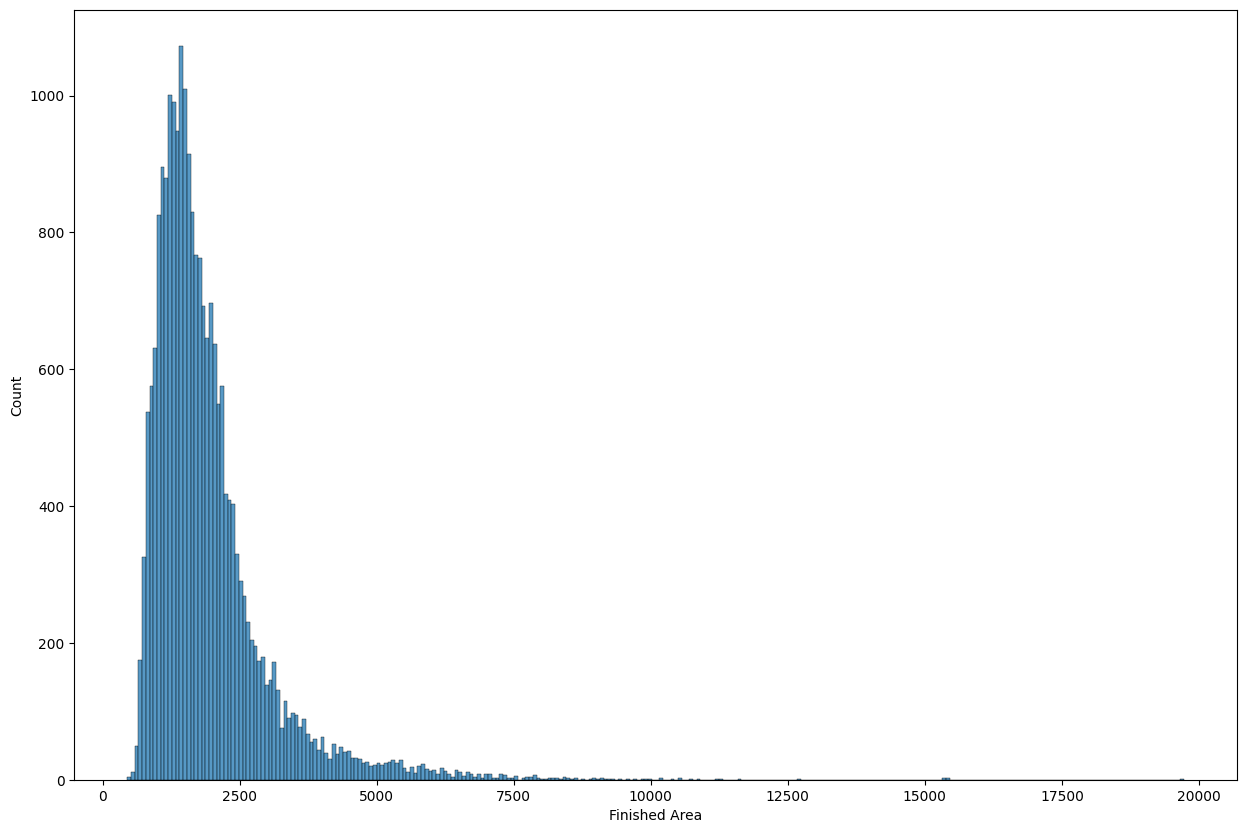

In [420]:
# see distribution / it is skewed - filling missing values for this variable with median 

plt.figure(figsize=(15,10))
sns.histplot(housing_df['Finished Area'])

In [422]:
# deal with missing values
# fill categorical variables Foundation Type,Full Bath,Half Bath,Bedrooms with mode
# fill Finished Area variable with median
# drop missing values of Property Address and Property City
# drop Suite/ Condo columns

housing_df['Foundation Type'] = housing_df['Foundation Type'].fillna(housing_df['Foundation Type'].mode()[0])
housing_df['Full Bath'] = housing_df['Full Bath'].fillna(housing_df['Full Bath'].mode()[0])
housing_df['Half Bath'] = housing_df['Half Bath'].fillna(housing_df['Half Bath'].mode()[0])
housing_df['Bedrooms'] = housing_df['Bedrooms'].fillna(housing_df['Bedrooms'].mode()[0])
housing_df['Finished Area'] = housing_df['Finished Area'].fillna(housing_df['Finished Area'].median())



In [423]:
# drop missing values of Property Address and Property City and 
# drop Suite/ Condo columns

housing_df= housing_df.dropna(axis=1, how='any', inplace=False) 


In [425]:
# check for duplicated observations

housing_df.duplicated().sum()

0

In [426]:
 # split the data based on year of sale. 
housing_df[["Sales day", "Sales month", "Sales year"]] = housing_df["Sale Date"].str.split("/", expand = True)

In [427]:

# indicate predictor and predicted variables

y = housing_df['Sale Price Compared To Value']

x = housing_df.drop(['Sale Price Compared To Value','City','State','Legal Reference','Parcel ID','Sale Date','Unnamed: 0'], axis=1)

# split our data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [428]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [440]:
# Logistic Regression

logistic_model=LogisticRegression(solver='liblinear', random_state= 1 )
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

print(logistic_model.score(x_train,y_train)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


76.58940397350993
[[3260  135]
 [ 950  186]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      3395
           1       0.58      0.16      0.26      1136

    accuracy                           0.76      4531
   macro avg       0.68      0.56      0.56      4531
weighted avg       0.73      0.76      0.71      4531



In [430]:
#Benchmarking process Logistic Regression

# accuracy 
mean_squared_error(y_test,y_pred)


0.2394614875303465

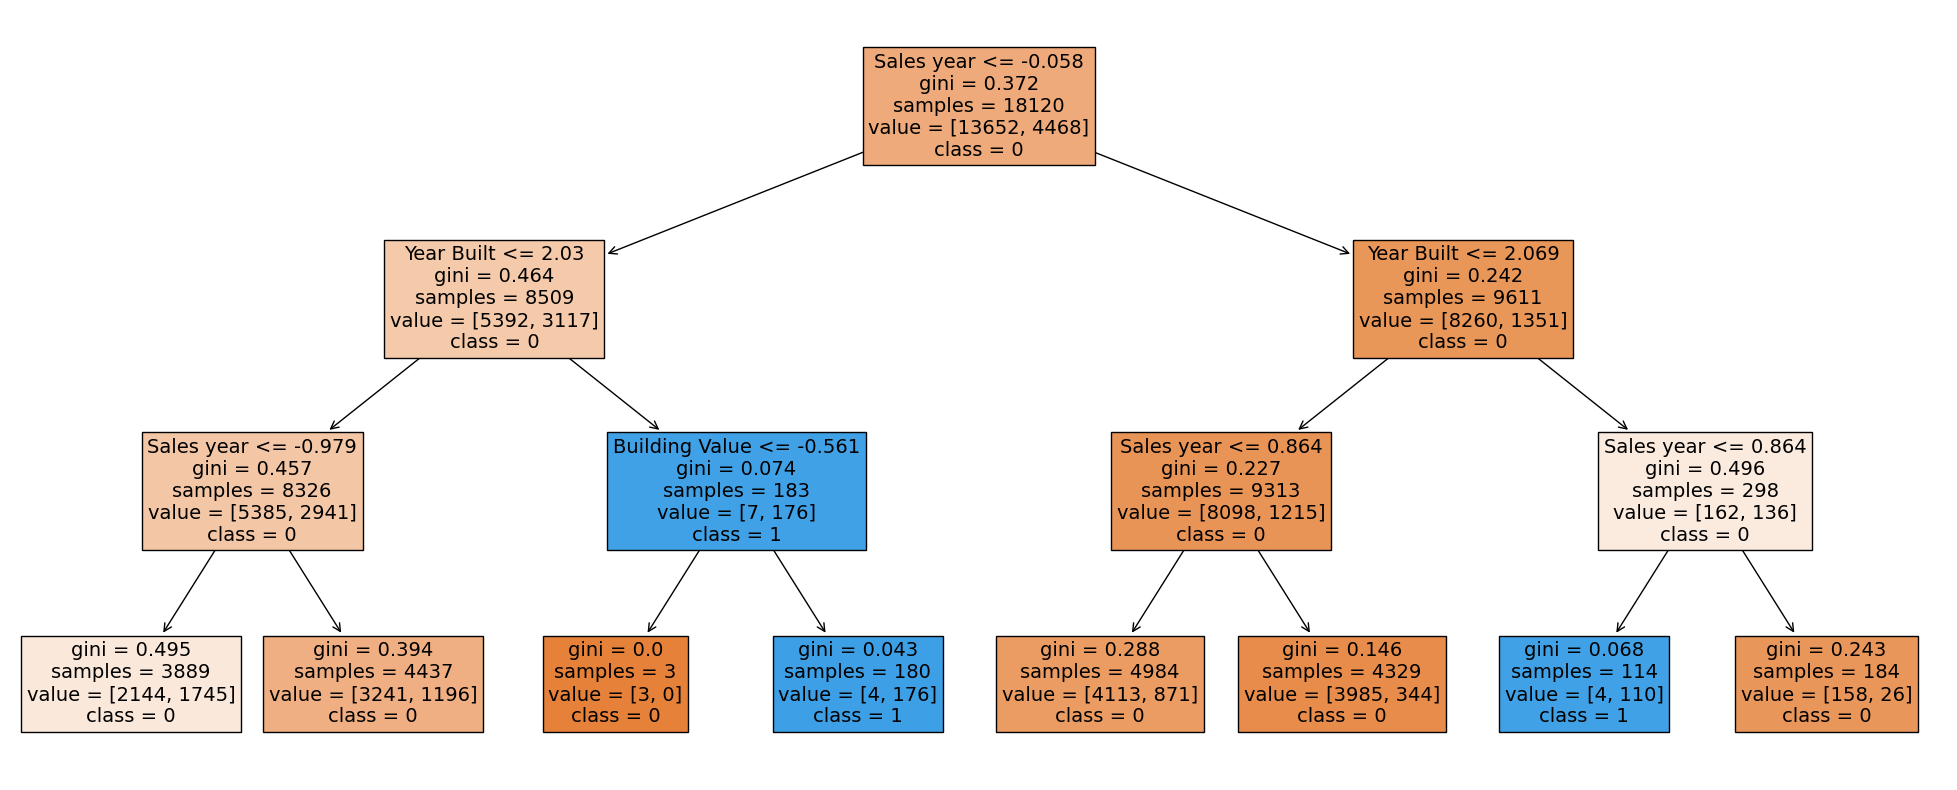

In [441]:
# decision tree

treemodel = DecisionTreeClassifier(max_depth= 3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot = tree.plot_tree(treemodel,feature_names=x.columns.values.tolist() , class_names=['0','1'], filled= True , fontsize=14)

In [443]:
model = treemodel.fit(x_train , y_train)
y_treepred = model.predict(x_test)
print("accuracy" , metrics.accuracy_score(y_test,y_treepred))

cm=confusion_matrix(y_test,y_treepred)
print(confusion_matrix(y_test, y_treepred))
print(classification_report(y_test, y_treepred))


accuracy 0.7625248289560803
[[3393    2]
 [1074   62]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3395
           1       0.97      0.05      0.10      1136

    accuracy                           0.76      4531
   macro avg       0.86      0.53      0.48      4531
weighted avg       0.81      0.76      0.67      4531



In [433]:
#Benchmarking process decision tree

# accuracy 
mean_squared_error(y_test,y_treepred)


0.2295299050982123

In [444]:
# Random Forest

rfclass = RandomForestClassifier(n_estimators= 20 , random_state=0)
rfclass.fit(x_train,y_train)
rfypred = rfclass.predict(x_test)
print("accuracy" , rfclass.score(x_test,y_test))

cm=confusion_matrix(y_test,rfypred)
print(confusion_matrix(y_test, rfypred))
print(classification_report(y_test, rfypred))


accuracy 0.7841536084749503
[[3223  172]
 [ 806  330]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3395
           1       0.66      0.29      0.40      1136

    accuracy                           0.78      4531
   macro avg       0.73      0.62      0.64      4531
weighted avg       0.76      0.78      0.75      4531



In [435]:
#Benchmarking process Random Forest

# accuracy 
mean_squared_error(y_test,rfypred)


0.21584639152504967

In [445]:
# Gradient Boost

gbclass = GradientBoostingClassifier(n_estimators=20 , random_state=None)
gbclass.fit(x_train,y_train)
gbypred = gbclass.predict(x_test)
print("accuracy" ,gbclass.score(x_test,y_test))

cm=confusion_matrix(y_test,gbypred)
print(confusion_matrix(y_test, gbypred))
print(classification_report(y_test, gbypred))


accuracy 0.7742220260428162
[[3353   42]
 [ 981  155]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      3395
           1       0.79      0.14      0.23      1136

    accuracy                           0.77      4531
   macro avg       0.78      0.56      0.55      4531
weighted avg       0.78      0.77      0.71      4531



In [437]:
#Benchmarking process Gradient Boost

# accuracy 
mean_squared_error(y_test,gbypred)

#

0.22577797395718385